<a href="https://colab.research.google.com/github/dharmindave/CS680/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

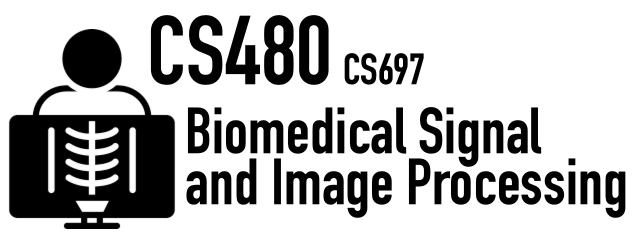
# Assignment 1


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [8]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

(3240.0, 3960.0)

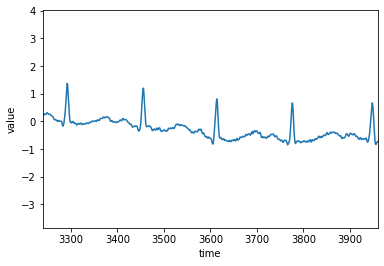

In [9]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
x=[9*SAMPLING_RATE, 11*SAMPLING_RATE]
plt.xlabel("time")
plt.ylabel("value")
plt.plot(ecg)
plt.xlim(x)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [10]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [11]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk
import seaborn as sns


     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [12]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [13]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


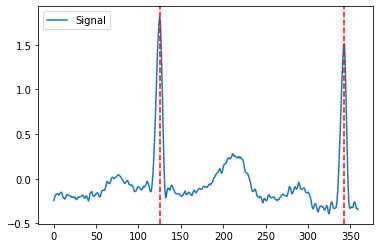

In [14]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

Text(0, 0.5, 'value')

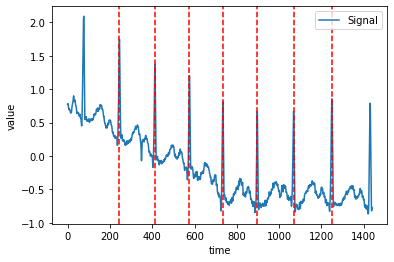

In [15]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

ninetoelevenecg=ecg[8*SAMPLING_RATE:12*SAMPLING_RATE]
_, selected_rpeaks = nk.ecg_peaks(ninetoelevenecg, sampling_rate=SAMPLING_RATE)

plot = nk.events_plot(selected_rpeaks['ECG_R_Peaks'],ninetoelevenecg )
plt.xlabel("time")
plt.ylabel("value")

**Task 3:** Detect Heartrate. [15 Points]

In [34]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 
# collaborated with shreyansh Dhandhukiya 
num_of_peaks = 7    
num_of_sec = 4
print((60*7)/4)

105.0


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [35]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

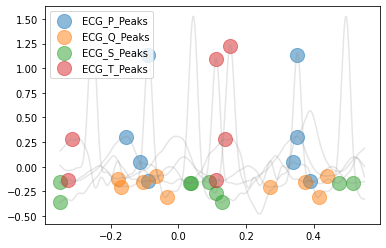

In [39]:
ecg_cleaned = nk.ecg_clean(ecg, SAMPLING_RATE, method="neurokit")

_, rpeaks = nk.ecg_peaks(ecg_cleaned[SAMPLING_RATE*9:SAMPLING_RATE*12], sampling_rate=SAMPLING_RATE)
_, waves_peaks = nk.ecg_delineate(ecg_cleaned, rpeaks, SAMPLING_RATE, show=True, show_type='peaks')




In [40]:
# TODO Does the detection work well?
print("yes")

yes


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

R-peaks and P-Q-S-T peaks before filtering


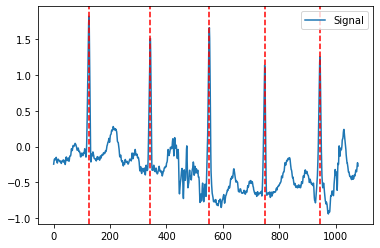

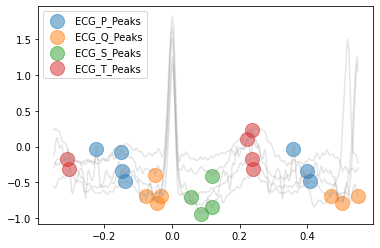

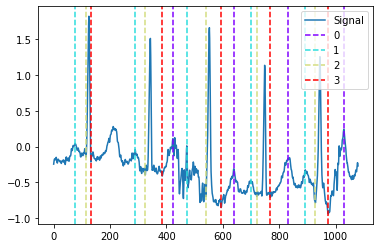

In [41]:
_, rpeaks = nk.ecg_peaks(ecg[SAMPLING_RATE*0:SAMPLING_RATE*3], sampling_rate=SAMPLING_RATE)



print("R-peaks and P-Q-S-T peaks before filtering")
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:5], ecg[0:SAMPLING_RATE*3])

_, waves_peaks = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

plot = nk.events_plot([waves_peaks['ECG_T_Peaks'][0:5],
                       waves_peaks['ECG_P_Peaks'][0:5],
                       waves_peaks['ECG_Q_Peaks'][0:5],
                       waves_peaks['ECG_S_Peaks'][0:5]], ecg[0:SAMPLING_RATE*3])

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

the R-peaks and P Q S T peaks after filtering


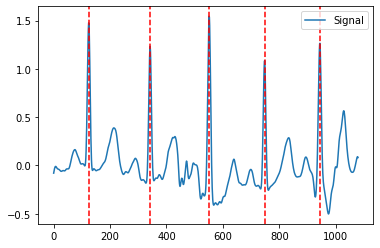

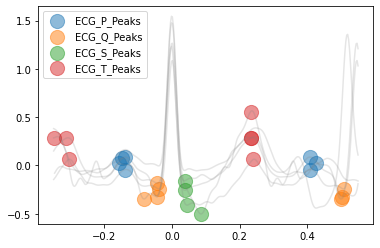

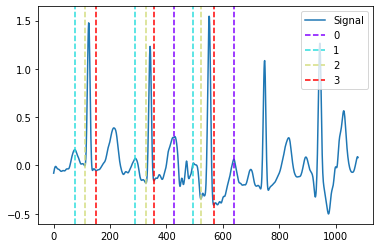

In [32]:
filtered_ecg = nk.signal_filter(ecg, lowcut=1, highcut=60, method='butterworth', order=2)

print ("the R-peaks and P Q S T peaks after filtering")

plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:5], filtered_ecg[0:SAMPLING_RATE*3])

_, waves_peaks = nk.ecg_delineate(filtered_ecg, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')



plot = nk.events_plot([waves_peaks['ECG_T_Peaks'][0:3],
                       waves_peaks['ECG_P_Peaks'][0:3],
                       waves_peaks['ECG_Q_Peaks'][0:3],
                       waves_peaks['ECG_S_Peaks'][0:3]], filtered_ecg[0:SAMPLING_RATE*3])

In [42]:
# TODO Does the filtering improve the result?
print("yes")

yes


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#